## Project Definition

Pokémon is a Japanese media franchise consisting of video games, animated series and films, a trading card game, and other related media. 


Pokémon are fictional creatures that live in the Pokémon World alongside humans and are the focus of the Pokémon franchise. The name is short for "pocket monsters", and the franchise includes over 1,000 species with unique designs, skills, and powers. Pokémon can be inspired by animals, plants, and mythological creatures, and many can evolve into more powerful species or change forms. Additionally, Pokemon are classified into 18 different Types, or properties that are applied to the Pokemon themselves or special moves and attacks they can do. 

In this project, we will be predicting a Pokemon’s type based on several of the Pokemon’s attributes. This predictive model will help in identifying a Pokémon's type, which can be a strategic tool for battles, team building, and understanding Pokémon characteristics.

 <hr> <hr/>


## Problem Statement: 

The problem we are solving is the identification and prediction of a Pokémon’s type based on its various attributes such as attack, defense, speed, and other features. This relates to the lectures and papers on classification problems and the application of machine learning models to categorical data.
 <hr> <hr/>

## Novelty and Importance: 

Being able to predict a Pokemon’s type has a wide variety of applications. Within the Pokemon universe, some Pokemon types are stronger than others. For example, Fire-Type Pokemon are weak against Water-Type Pokemon; Fire-Type Pokemon are strong against Ice-Type Pokemon, etc. Being able to analyze and predict an unfamiliar Pokemon’s type would prove to be an instrumental tool within Pokemon battles–battles between Pokemon. 

The project is exciting because it combines the engaging world of Pokémon with advanced data science techniques. It allows us to apply theoretical knowledge to a practical, fun, and widely recognized context.
 <hr> <hr/>

## Data

Originally, we planned on using a <a href = https://www.kaggle.com/datasets/rounakbanik/pokemon>pre-existing Pokemon dataset</a>, however we found that the dataset was outdated; the dataset was last updated when the Pokemon Sun Pokemon Moon games released, which was nearly 8 years ago. 

As a solution, we decided to code our own webscraper. Our scraper utilizes Scrapy to first gather a constantly updating list of every Pokemon. Then, we used the list to scrape <a href = https://bulbapedia.bulbagarden.net/wiki/Main_Page>Bulbapedia</a>, an online Pokemon encyclopedia. For our scraper, we utilized BeautifulSoup to scrape the data we needed, and Pandas to store the data.

Additionally, as a novelty, we created a script that would convert our Pandas dataframe with all of our Pokemon data into a MySQL database, where we would preform our Exploratory Data Analysis. 

## Exploratory Data Analysis

### Most Common Pokémon Types

To understand the distribution of Pokémon types in our dataset, we analyzed the frequency of each type appearing in the `type1` and `type2` columns. By combining these two columns and counting the occurrences of each type, we can determine which types are the most common and which are the least common among all Pokémon.


In [ ]:
SELECT type, COUNT(*) AS count
FROM (
    SELECT type1 AS type FROM pokemon2
    UNION ALL
    SELECT type2 AS type FROM pokemon2
) AS combined_types
WHERE type IS NOT NULL
GROUP BY type
ORDER BY count DESC;

The table below summarizes the most common and least common Pokémon types in our dataset:

<table>
    <tr>
        <th>Type</th>
        <th>Count</th>
    </tr>
    <tr>
        <td>water</td>
        <td>154</td>
    </tr>
    <tr>
        <td>normal</td>
        <td>131</td>
    </tr>
    <tr>
        <td>grass</td>
        <td>127</td>
    </tr>
    <tr>
        <td>flying</td>
        <td>109</td>
    </tr>
    <tr>
        <td>psychic</td>
        <td>102</td>
    </tr>
    <tr>
        <td>bug</td>
        <td>92</td>
    </tr>
    <tr>
        <td>poison</td>
        <td>83</td>
    </tr>
    <tr>
        <td>fire</td>
        <td>81</td>
    </tr>
    <tr>
        <td>ground</td>
        <td>75</td>
    </tr>
    <tr>
        <td>rock</td>
        <td>74</td>
    </tr>
    <tr>
        <td>fighting</td>
        <td>73</td>
    </tr>
    <tr>
        <td>dragon</td>
        <td>70</td>
    </tr>
    <tr>
        <td>electric</td>
        <td>69</td>
    </tr>
    <tr>
        <td>dark</td>
        <td>69</td>
    </tr>
    <tr>
        <td>ghost</td>
        <td>65</td>
    </tr>
    <tr>
        <td>steel</td>
        <td>65</td>
    </tr>
    <tr>
        <td>fairy</td>
        <td>64</td>
    </tr>
    <tr>
        <td>ice</td>
        <td>48</td>
    </tr>
</table>


However, it is important to note that there are 9 main series Pokemon games to gather data from. The dataset we utilized contains information from the first 7 main series games. For the purposes of this project, we decided to utilize this subset of all Pokemon for our exploratory data analysis and prediction models. Our prediction model will utilize Pokemon from these first 7 games as training data and the remaining Pokemon not included in this database as our testing data.

From our analysis, the most common type a Pokemon may have is the Water type. The least common type a Pokemon may have is the Ice type.

### Visualizing our Data

If we are to create prediction models surrounding our data, our first step is understanding the data we are working with. 

Each Pokemon has 6 different battle stats: HP, Attack, Special Attack, Defense, Special Defense, and Speed. All of these stats added together becomes a Pokemon's base stat total (BST). 

We can first visualize different Pokemon's stats using histograms and distribution plots. 

### Histogram visualization:

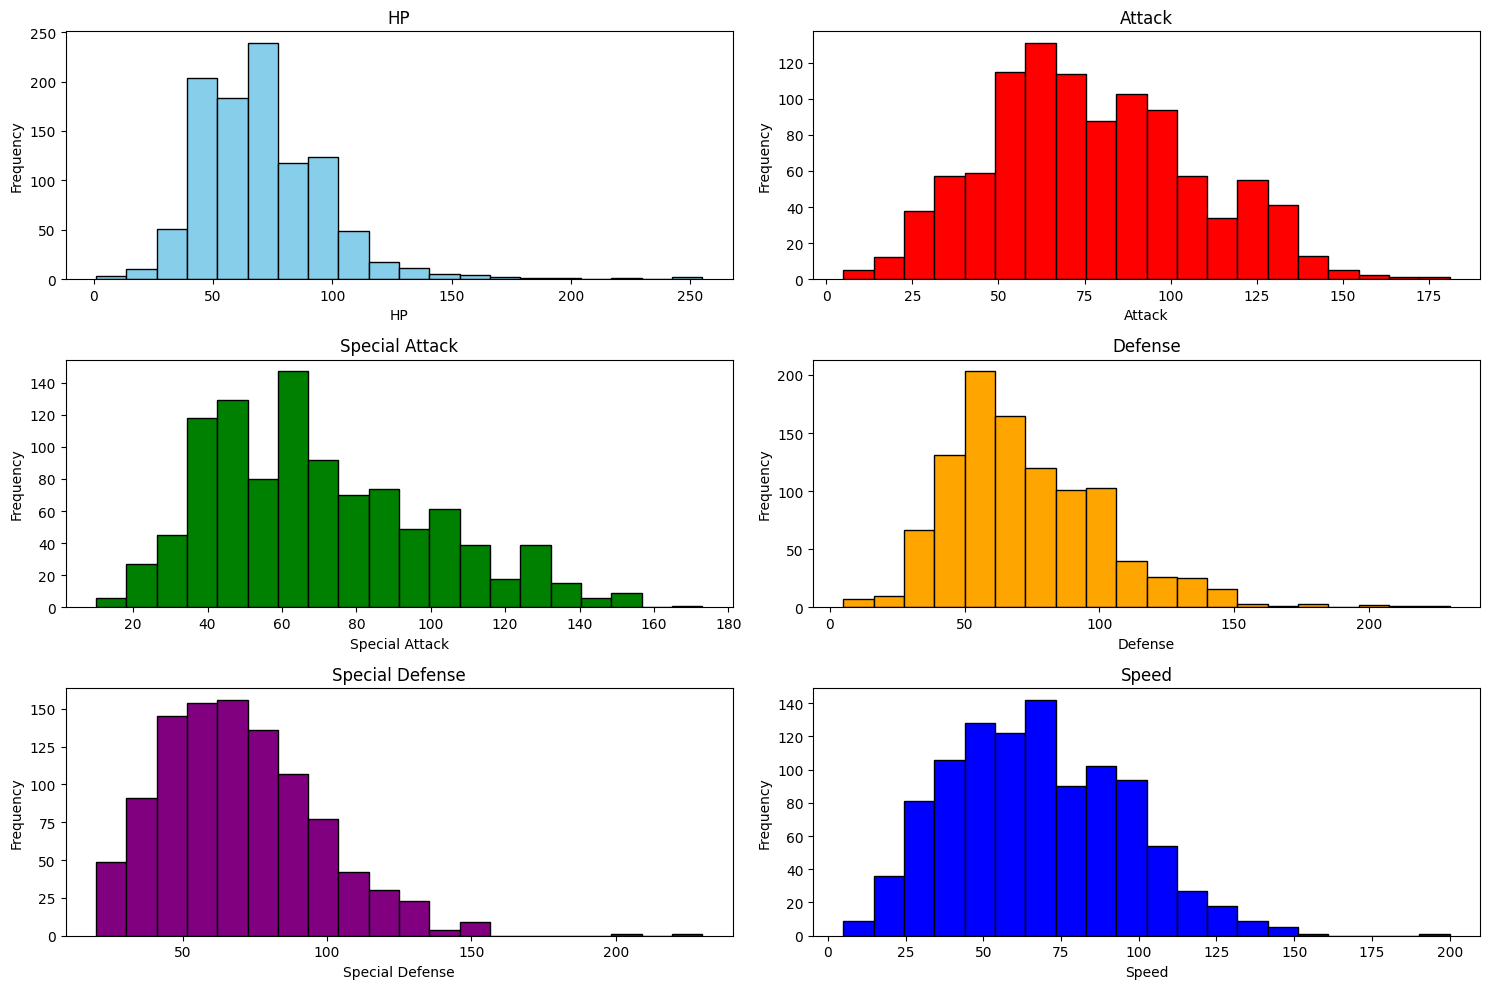

(array([ 14.,  19.,  33.,  48., 109.,  74.,  54.,  35.,  83.,  40.,  78.,
        168.,  86.,  61.,  54.,  45.,   0.,   1.,  22.,   1.]),
 array([175.  , 202.25, 229.5 , 256.75, 284.  , 311.25, 338.5 , 365.75,
        393.  , 420.25, 447.5 , 474.75, 502.  , 529.25, 556.5 , 583.75,
        611.  , 638.25, 665.5 , 692.75, 720.  ]),
 <BarContainer object of 20 artists>)

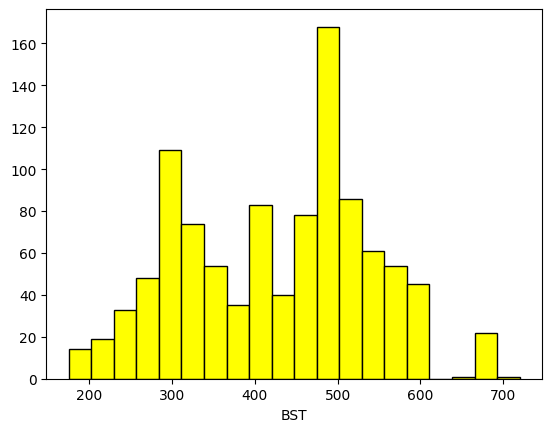

In [14]:
from matplotlib import pyplot as plt
import numpy as np

import pandas as pd
df = pd.read_csv( "pokemon2.csv", header = 0)



# Data extraction
hp = df['hp']
attack = df['attack']
sp_attack = df['sp_attack']
defense = df['defense']
sp_defense = df['sp_defense']
speed = df['speed']
bst = df['base_total']

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

#HP
axs[0, 0].hist(hp, bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('HP')
axs[0, 0].set_xlabel('HP')
axs[0, 0].set_ylabel('Frequency')

#Attack
axs[0, 1].hist(attack, bins=20, color='red', edgecolor='black')
axs[0, 1].set_title('Attack')
axs[0, 1].set_xlabel('Attack')
axs[0, 1].set_ylabel('Frequency')

#Special Attack
axs[1, 0].hist(sp_attack, bins=20, color='green', edgecolor='black')
axs[1, 0].set_title('Special Attack')
axs[1, 0].set_xlabel('Special Attack')
axs[1, 0].set_ylabel('Frequency')

#Defense
axs[1, 1].hist(defense, bins=20, color='orange', edgecolor='black')
axs[1, 1].set_title('Defense')
axs[1, 1].set_xlabel('Defense')
axs[1, 1].set_ylabel('Frequency')

#Special Defense
axs[2, 0].hist(sp_defense, bins=20, color='purple', edgecolor='black')
axs[2, 0].set_title('Special Defense')
axs[2, 0].set_xlabel('Special Defense')
axs[2, 0].set_ylabel('Frequency')

#Speed
axs[2, 1].hist(speed, bins=20, color='blue', edgecolor='black')
axs[2, 1].set_title('Speed')
axs[2, 1].set_xlabel('Speed')
axs[2, 1].set_ylabel('Frequency')



# Adjust layout
plt.tight_layout()
plt.show()

plt.xlabel('BST')
plt.hist(bst, bins=20, color='yellow', edgecolor='black')



### The normal distribution of Pokemon stats and their base stat total:

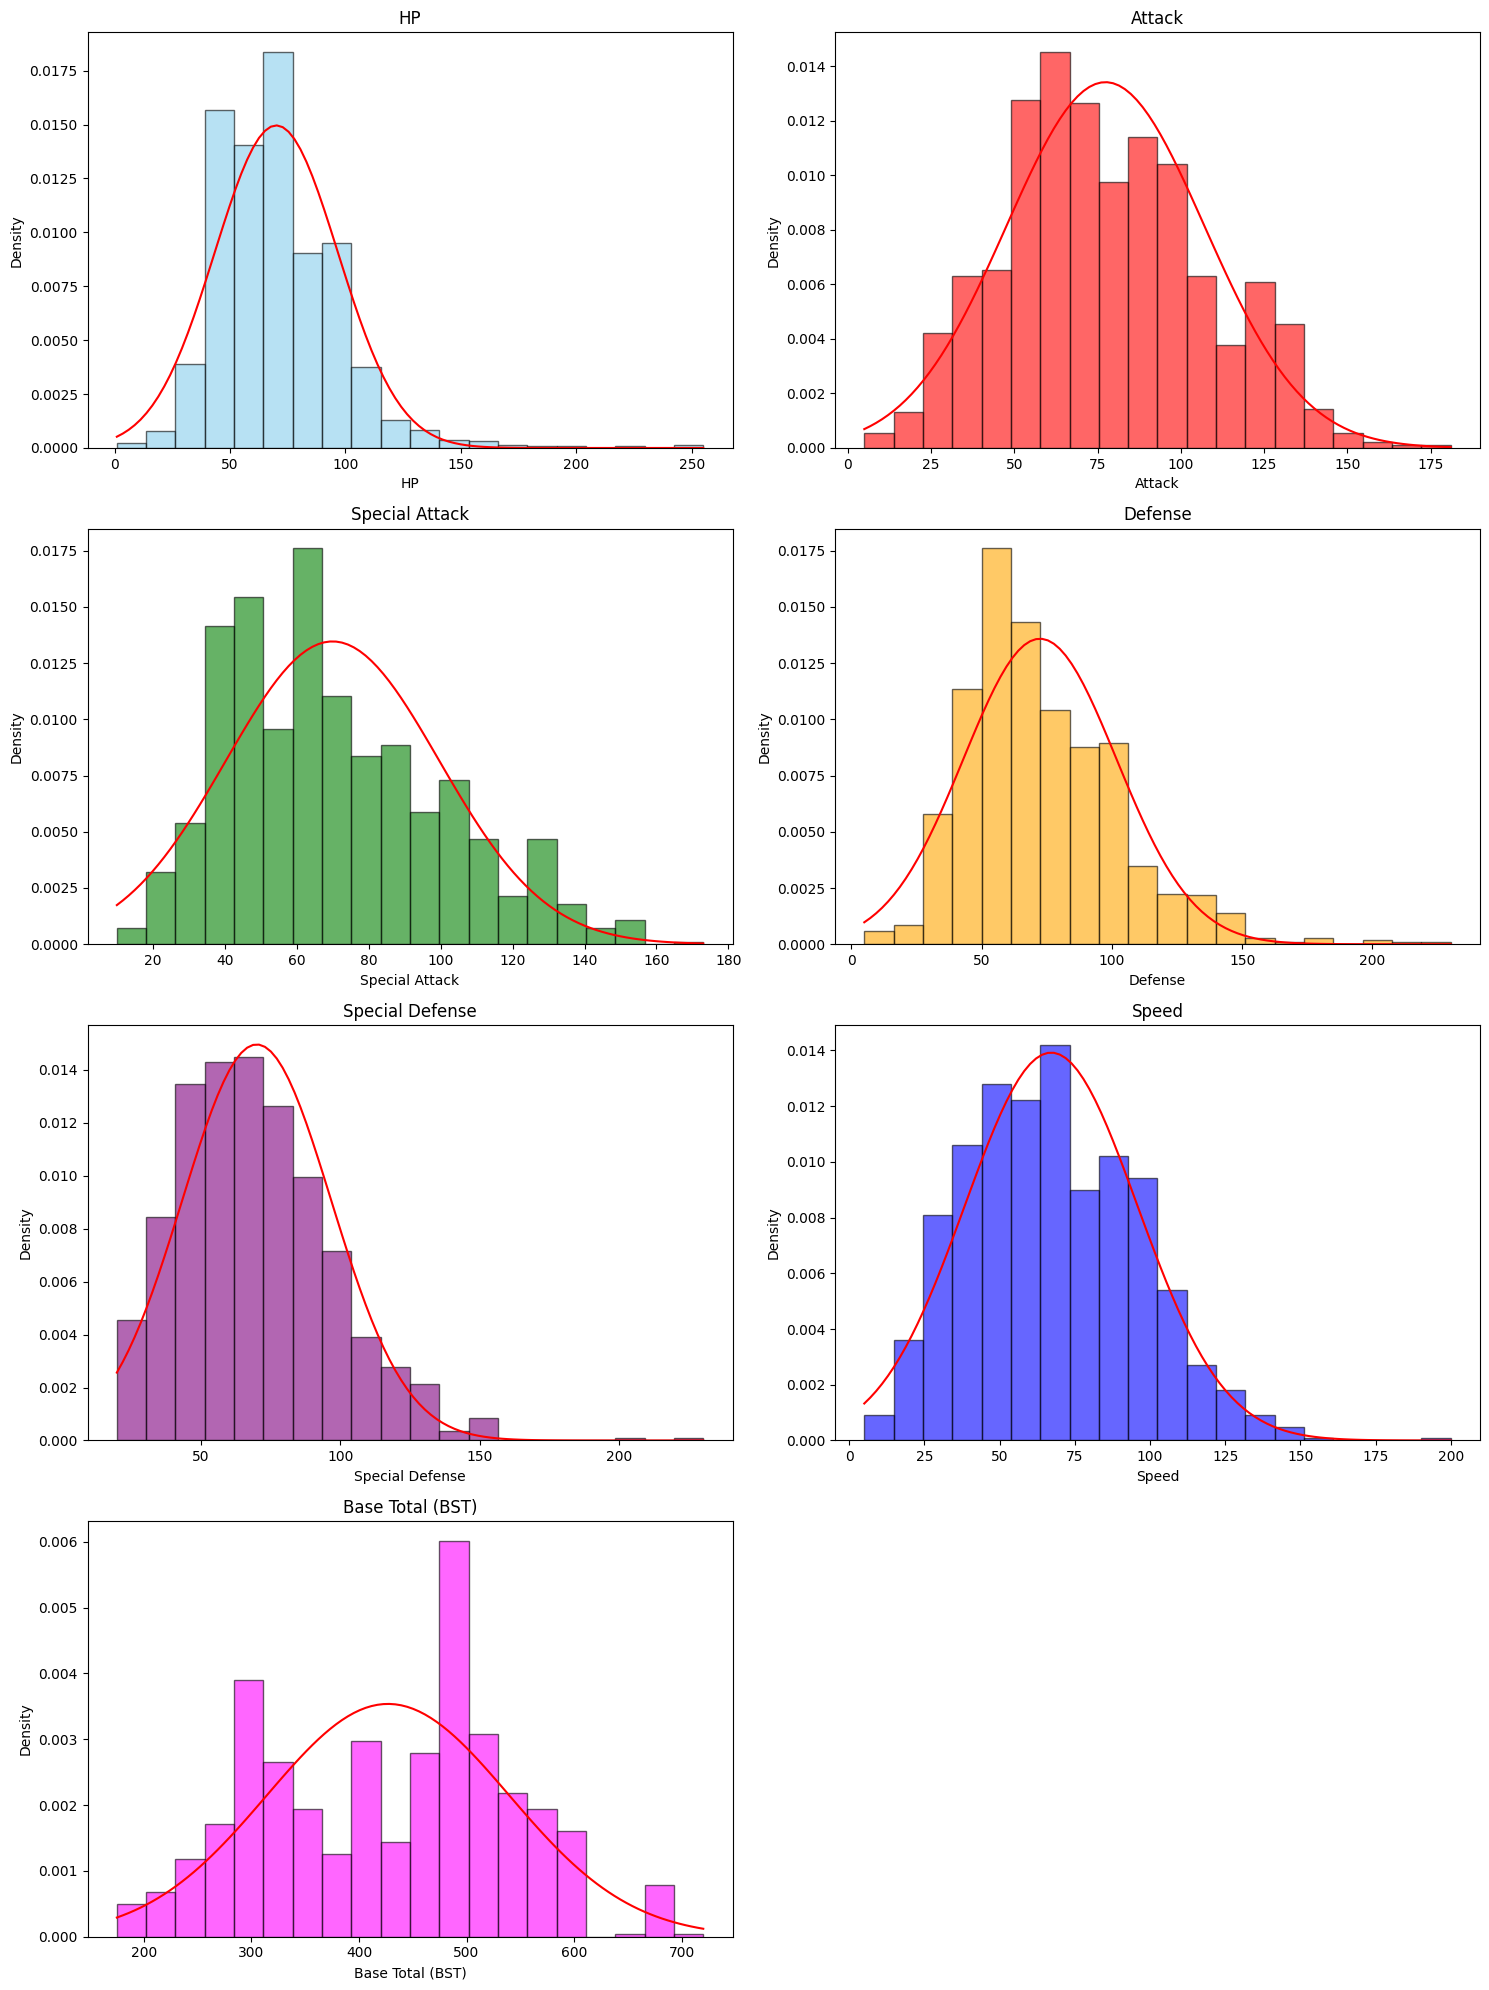

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as ss

# Data extraction
hp = df['hp']
attack = df['attack']
sp_attack = df['sp_attack']
defense = df['defense']
sp_defense = df['sp_defense']
speed = df['speed']
bst = df['base_total']

# Function to plot histogram and normal distribution
def plot_histogram_with_normal(ax, data, title, color):
    # Plot histogram
    ax.hist(data, bins=20, color=color, edgecolor='black', density=True, alpha=0.6)
    
    # Plot normal distribution
    normfit = ss.norm.pdf(np.linspace(min(data), max(data), 100), data.mean(), data.std())
    ax.plot(np.linspace(min(data), max(data), 100), normfit, label='Normal Fit', color='red')
    
    # Set title and labels
    ax.set_title(title)
    ax.set_xlabel(title)
    ax.set_ylabel('Density')

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Plot histograms and normal distributions
plot_histogram_with_normal(axs[0, 0], hp, 'HP', 'skyblue')
plot_histogram_with_normal(axs[0, 1], attack, 'Attack', 'red')
plot_histogram_with_normal(axs[1, 0], sp_attack, 'Special Attack', 'green')
plot_histogram_with_normal(axs[1, 1], defense, 'Defense', 'orange')
plot_histogram_with_normal(axs[2, 0], sp_defense, 'Special Defense', 'purple')
plot_histogram_with_normal(axs[2, 1], speed, 'Speed', 'blue')
plot_histogram_with_normal(axs[3, 0], bst, 'Base Total (BST)', 'magenta')

# Hide any unused subplots
axs[3, 1].axis('off')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()


## Training Model and Techniques

For this research project, we will be using a decision tree model since we are dealing with a problem of classification. We set up our prediction model as follows. 

In [16]:
import pandas as pd

df = pd.read_csv( "pokemon2.csv", header = 0)
display(df)

,name,abilities,type1,type2,is_legendary,japanese_name,hp,attack,defense,sp_attack,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",grass,poison,0,Fushigidane,45,49,49,65,...,1.0,0.25,1.0,2.0,1.0,1.00,2.00,1.0,1.0,0.5
1,Ivysaur,"['Overgrow', 'Chlorophyll']",grass,poison,0,Fushigisou,60,62,63,80,...,1.0,0.25,1.0,2.0,1.0,1.00,2.00,1.0,1.0,0.5
2,Venusaur,"['Overgrow', 'Chlorophyll', 'Thick Fat']",grass,poison,0,Fushigibana,80,82,83,100,...,1.0,0.25,1.0,2.0,1.0,1.00,2.00,1.0,1.0,0.5
3,Charmander,"['Blaze', 'Solar Power']",fire,NaN,0,Hitokage,39,52,43,60,...,1.0,0.50,2.0,0.5,1.0,1.00,1.00,2.0,0.5,2.0
4,Charmeleon,"['Blaze', 'Solar Power']",fire,NaN,0,Lizardo,58,64,58,80,...,1.0,0.50,2.0,0.5,1.0,1.00,1.00,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],electric,dragon,0,Takeruraiko,125,73,91,137,...,1.0,0.50,2.0,2.0,1.0,1.00,1.00,1.0,0.5,0.5
1021,Iron Boulder,['Quark Drive'],rock,psychic,0,Tetsunoiwao,90,120,80,68,...,2.0,2.00,2.0,1.0,0.5,0.50,0.50,1.0,2.0,2.0
1022,Iron Crown,['Quark Drive'],steel,psychic,0,Tetsunokashira,90,72,100,122,...,2.0,0.50,2.0,0.5,0.5,0.00,0.25,0.5,0.5,1.0
1023,Terapagos,"['Tera Shift', 'Tera Shell', 'Teraform Zero']",normal,NaN,1,Terapagos,90,65,85,65,...,0.0,1.00,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0


In [17]:
from sklearn.model_selection import train_test_split
against_columns = [col for col in df.columns if col.startswith('against_')]
x = df[against_columns]

y = df['type1']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33)


In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=.01)
clf = clf.fit(x_train, y_train)

y_test

515       water
565        rock
852    fighting
977      dragon
596       grass
         ...   
482       steel
41       poison
612         ice
872         ice
817       water
Name: type1, Length: 339, dtype: object

In [19]:
predictions = clf.predict(x_test)
predictions

array(['water', 'rock', 'fighting', 'water', 'grass', 'fire', 'fairy',
       'fairy', 'normal', 'water', 'fighting', 'water', 'psychic',
       'normal', 'fighting', 'ground', 'grass', 'dark', 'psychic',
       'grass', 'water', 'psychic', 'bug', 'steel', 'poison', 'psychic',
       'normal', 'rock', 'poison', 'ghost', 'grass', 'dragon', 'electric',
       'steel', 'steel', 'rock', 'electric', 'water', 'grass', 'water',
       'bug', 'normal', 'rock', 'water', 'grass', 'grass', 'ice', 'fire',
       'fairy', 'water', 'normal', 'ground', 'water', 'water', 'normal',
       'steel', 'normal', 'normal', 'normal', 'normal', 'dragon', 'steel',
       'fire', 'normal', 'normal', 'fighting', 'water', 'normal', 'dark',
       'normal', 'electric', 'bug', 'bug', 'rock', 'fighting', 'dark',
       'psychic', 'grass', 'grass', 'fire', 'rock', 'psychic', 'ghost',
       'electric', 'fairy', 'grass', 'grass', 'normal', 'dragon',
       'dragon', 'fighting', 'ice', 'ground', 'normal', 'rock', 'norma

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)


0.8141592920353983

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']
)

array([[17,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,
         2,  1],
       [ 0,  4,  2,  0,  0,  0,  0,  0,  0,  1,  0,  3,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
         0,  1],
       [ 0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  2,
         2,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0],
       [ 0,  1,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  1,  5,  1,  3,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0,  6,  4,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  0,  1,  0,  6,  0,  0,  0,  0,  1,
         1,  0],
       [ 1,  0,  0,  

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=['bug', 'dark', 'dragon', 
                                                               'electric', 'fairy', 'fighting', 'fire',
                                                              'flying', 'ghost', 'grass', 'ground', 'ice',
                                                                'normal', 'poison', 'psychic', 
                                                                'rock', 'steel', 'water'],
labels=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 
        'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']))


              precision    recall  f1-score   support

         bug       0.85      0.74      0.79        23
        dark       0.50      0.40      0.44        10
      dragon       0.53      0.73      0.62        11
    electric       0.92      0.71      0.80        17
       fairy       1.00      0.89      0.94         9
    fighting       0.80      0.92      0.86        13
        fire       0.90      0.66      0.76        29
      flying       0.00      0.00      0.00         0
       ghost       0.86      0.50      0.63        12
       grass       0.72      0.91      0.81        23
      ground       0.75      0.50      0.60        12
         ice       0.79      0.79      0.79        14
      normal       0.96      1.00      0.98        48
      poison       0.64      0.69      0.67        13
     psychic       0.95      0.83      0.88        23
        rock       0.69      1.00      0.81        22
       steel       0.59      0.67      0.62        15
       water       0.92    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: Undef

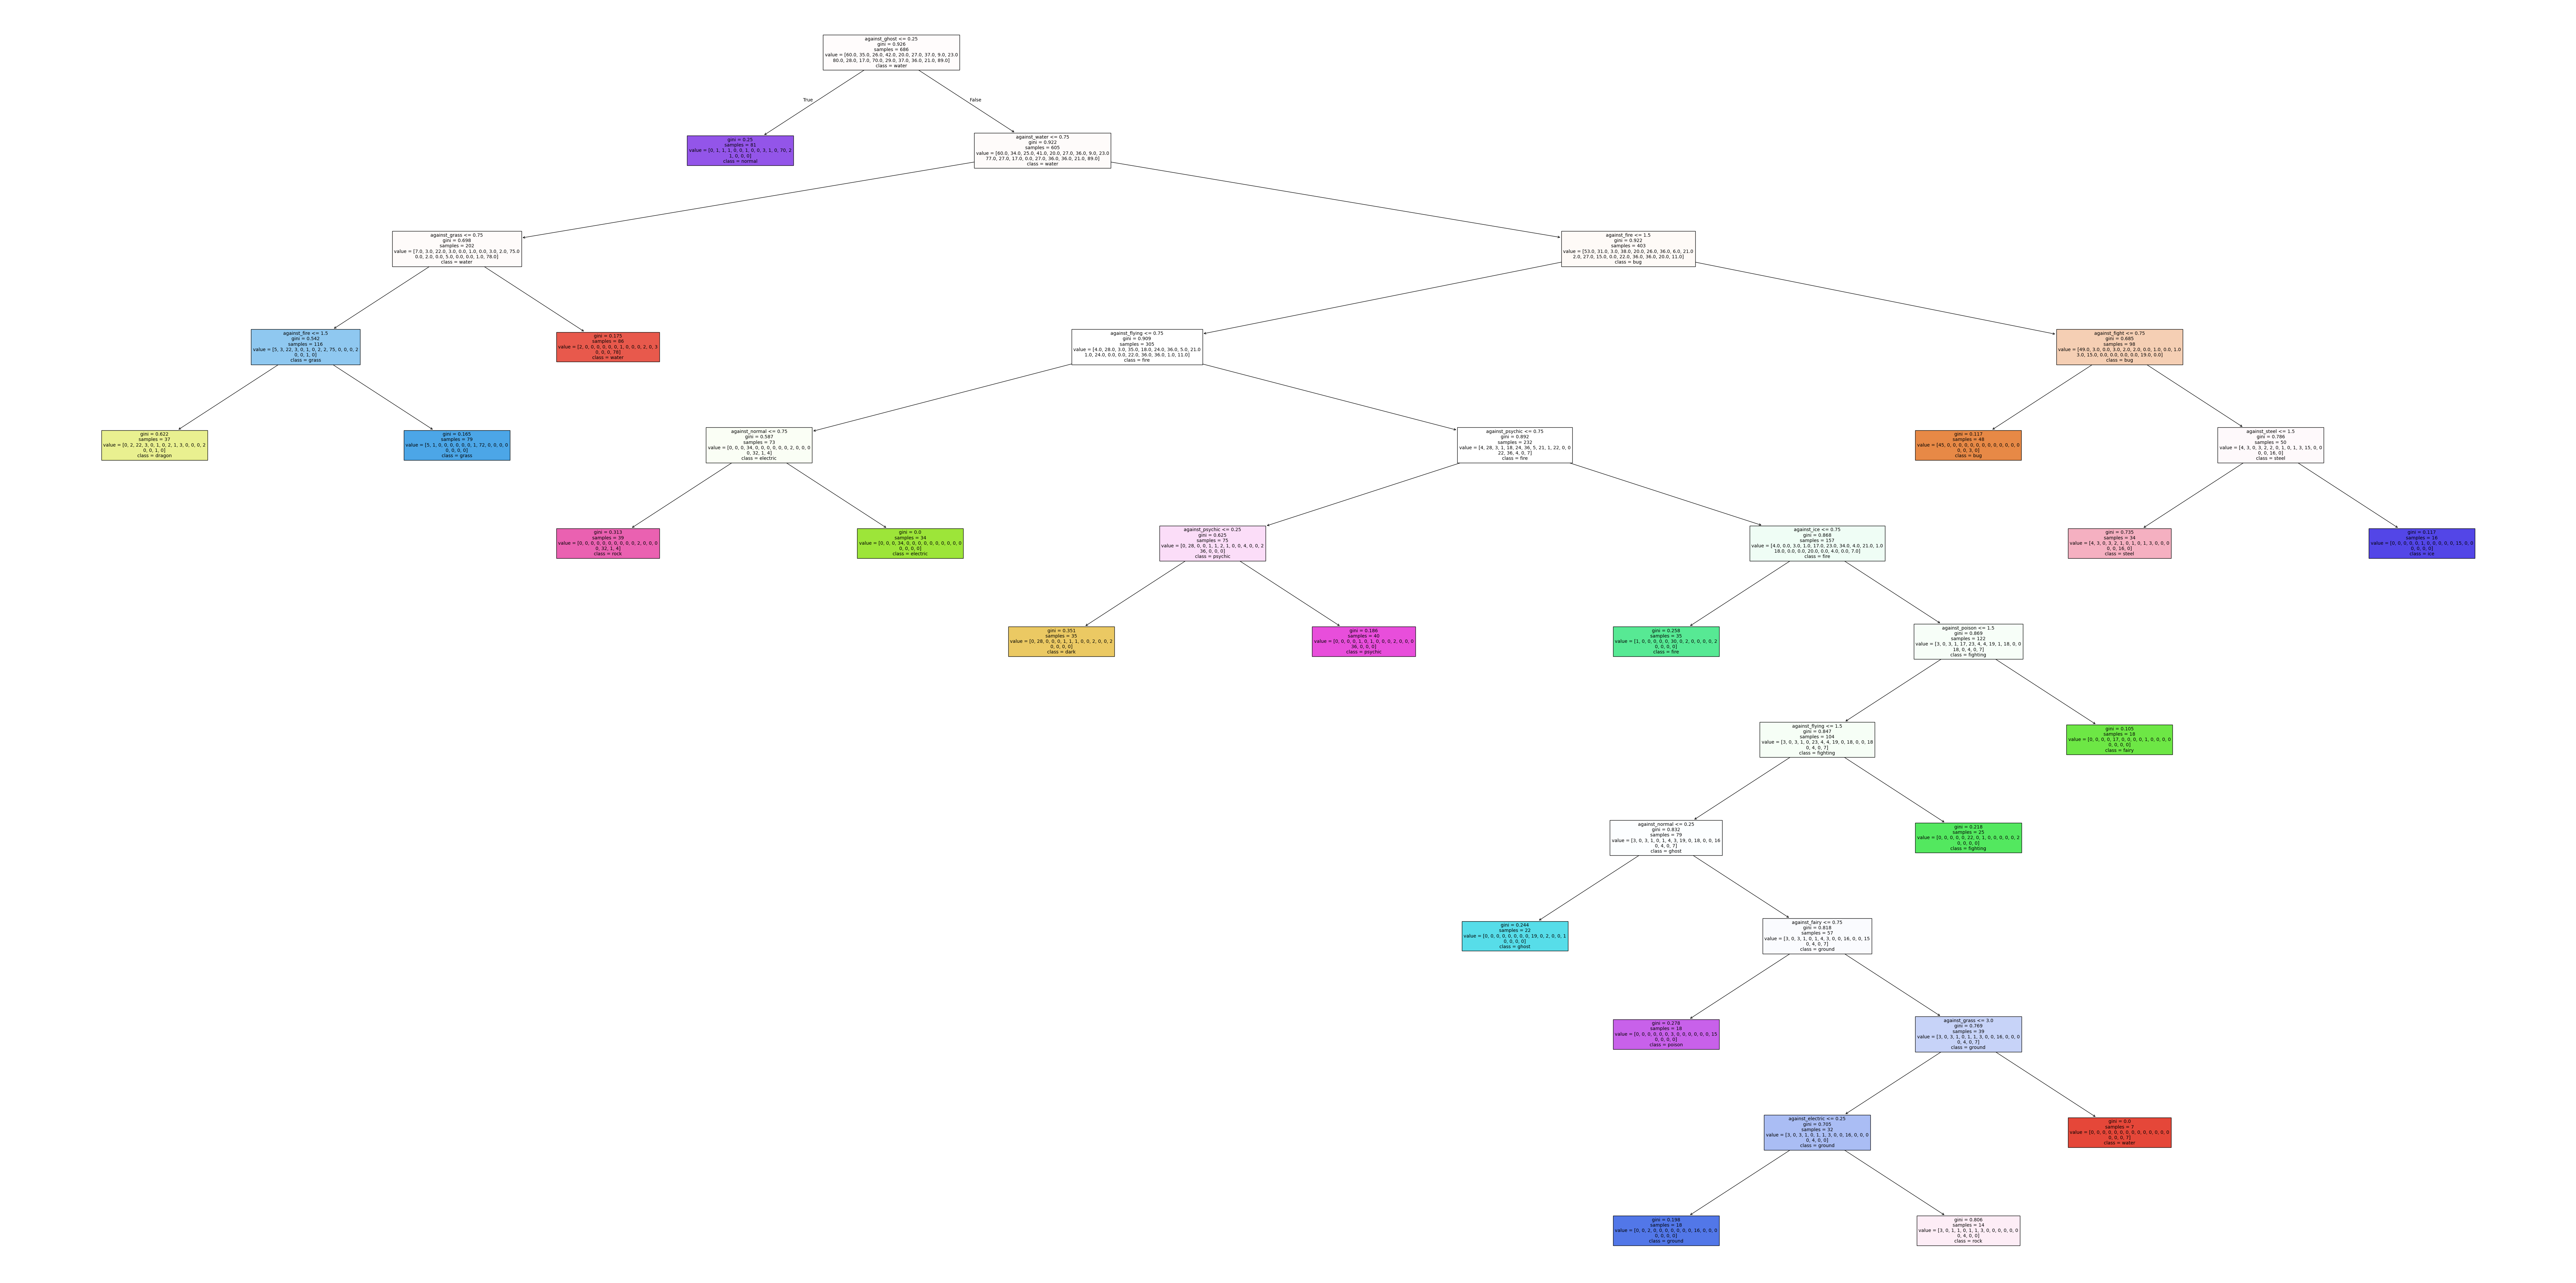

In [23]:
from sklearn import tree
from matplotlib import pyplot as plt

# Assuming clf has 19 classes (0 to 18)
class_names = {0: 'bug', 1: 'dark', 2: 'dragon', 3: 'electric', 4: 'fairy', 5: 'fighting',
               6: 'fire', 7: 'flying', 8: 'ghost', 9: 'grass', 10: 'ground', 11: 'ice',
               12: 'normal', 13: 'poison', 14: 'psychic', 15: 'rock', 16: 'steel',
               17: 'water'}  # Add additional class name if necessary

fig = plt.figure(figsize=(100, 50))
_ = tree.plot_tree(clf, 
                   feature_names=x.columns, 
                   class_names=class_names,
                   filled=True,
                   fontsize=10)


## Analysis

From our analysis, it appears as though a Pokemon's type effectiveness is an accurate way of predicting the Pokemon's type.

## Final Thoughts

As found in our project, a Pokemon's type effectiveness is an accurate predictor to what that Pokemon's type is. However, there are some limitations to this. For example, each Pokemon can have 1 or 2 types. Sometimes, when combining types, some weaknesses and resistances can cancel out. However, by and large, if you know what a Pokemon is weak and strong against, then it should be more than enough to tell you what type it is. Knowing what type a Pokemon is can be crucial in high stakes Pokemon battles between two trainers. 

Our project was without its fair share of disadvantages

For one, some Pokemon may have alternative forms. Our scraping program solely considers the Pokemon, not different forms it may have. For example, although the Pokemon Altaria (#334) is a dual typed Dragon/Flying type, a trainer may choose to Mega Evolve it during battle. Once Mega Evolved, Altaria becomes a Dragon/Fairy type. This new typing shakes up Altaria's type effectiveness fields in notable ways, such as having Dragon now be an immunity instead of a glaring weakness. Our scraper only considered a Pokemon's base form. 

Additionally, some of a Pokemon's abilities can also affect their type effectiveness. For example, take the Pokemon Elektross (#604). It is a pure Electric type. Normally, this would mean that it is only weak to Ground-type moves. However, Elektross has the ability Levitate, which gives it full immuinity to all Ground-type moves (granted, with some limited exceptions)

